# Setup

## Imports

In [10]:
import pandas as pd

from companion_module import (
    query_data_from_db,
    transform_data,
    mean_target_per_group,
    SimpleLinearRegression,
    plot,
    plot_x_vs_yy)

# Parameters

## Data

### Database connection

In [11]:
path2db = "../../../data/dsc.db"

### Sql query

In [12]:
sql_query = """
SELECT *
FROM broadcast
WHERE genre = 'Spielfilm'
    AND start_time_agf >= '2018-01-01'
    AND end_time_agf <= '2018-12-31'
"""

### Pd query

In [13]:
pd_query = "channel in 'RTL'"

### Target

In [14]:
target = 'duration'

### Feature

In [15]:
feature = 'month'

### Output

In [16]:
output = "prediction.csv"

## Model

### Model class

In [17]:
Model = SimpleLinearRegression

# Data

## Load

In [18]:
df = query_data_from_db(sql_query, path2db)

In [19]:
df

,RUN_ID,TITLE_ID,TITLE,CHANNEL,START_TIME_AGF,END_TIME_AGF,WEEKDAY,DURATION,GENRE,REPEAT
0,649705,31400,Unternehmen Petticoat,ARD Das Erste,2018-01-01 03:00:00,2018-01-01 03:10:00,Mo,655,Spielfilm,nein
1,649708,31089,NOBODY IST DER GROESSTE,Kabel Eins,2018-01-01 03:00:00,2018-01-01 04:40:00,Mo,6126,Spielfilm,ja
2,649716,46257,Dallas Buyers Club,ARD Das Erste,2018-01-01 03:10:00,2018-01-01 05:00:00,Mo,6454,Spielfilm,nein
3,649723,43440,Sydney White - Campus Queen,ProSieben,2018-01-01 04:20:00,2018-01-01 06:00:00,Mo,5989,Spielfilm,ja
4,649725,31854,Die Superbullen,Kabel Eins,2018-01-01 04:40:00,2018-01-01 06:00:00,Mo,4675,Spielfilm,nein
...,...,...,...,...,...,...,...,...,...,...
5351,739275,54732,PASSAGIER 23 - VERSCHWUNDEN AUF HOHER SEE,RTL,2018-12-30 00:20:00,2018-12-30 02:35:00,So,6963,Spielfilm,nein
5352,739284,30589,EDGAR WALLACE: DAS INDISCHE TUCH,Kabel Eins,2018-12-30 01:40:00,2018-12-30 02:55:00,So,4237,Spielfilm,ja
5353,739285,36273,Ring 2,ProSieben,2018-12-30 01:55:00,2018-12-30 02:55:00,So,3038,Spielfilm,nein
5354,739290,48354,The Boy Next Door,RTL,2018-12-30 02:35:00,2018-12-30 02:55:00,So,1272,Spielfilm,ja


## Transform

In [20]:
df = transform_data(
    df,
    columns2lower=True,
    freq_col=feature,
    query=pd_query)

## Aggregate

In [21]:
mean_duration_per_month = mean_target_per_group(
    df,
    group_cols=feature,
    target=target)

In [22]:
mean_duration_per_month

,month,duration
0,1,5232.111111
1,2,5786.000000
2,3,5496.611111
3,4,5371.708333
4,5,5386.458333
5,6,4301.666667
6,7,4719.040000
7,8,4566.000000
8,9,4958.571429
9,10,5384.272727


## Visualize

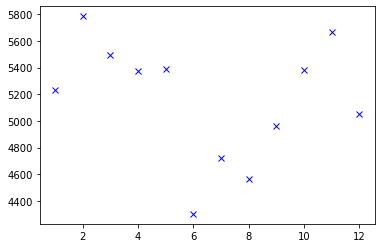

In [23]:
plot(mean_duration_per_month[feature], mean_duration_per_month[target])

# Model

## Fit

In [24]:
y = mean_duration_per_month[feature]
X = mean_duration_per_month[target]

In [25]:
model = Model().fit(X, y)

## Predict in-sample

In [26]:
in_sample_pred = model.predict(X)

## Visualize

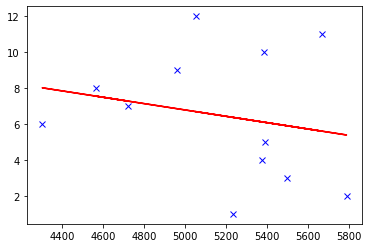

In [27]:
plot_x_vs_yy(X, y, in_sample_pred)

## Predict out-of-sample

In [28]:
y_13 = model.predict(pd.Series([3]))
print(f"Mean {target} for the 13th month is {round(y_13.squeeze()/ (60))} minutes.")

Mean duration for the 13th month is 0 minutes.


# Export in-sample predictions

In [29]:
in_sample_pred.to_csv(output, index=False)